#**Ingeniería de Atributos y Selección de Variables: Mejorando el Modelo de Machine Learning**

###**1.1 Objetivo** </br>
El objetivo de este trabajo es establecer un análisis de distintos escenarios en el cual un cupón de descuento del 20% es aceptado o no por pasajeros que son conducidos a través de automóviles contradados a través de distintas plataformas. Estos cupones pertenecen a distintos lugares gastronómicos de diversos rubros y perfiles. </br>

En específico, esta entrega amplía los mecanismos de evaluación para el modelo de ML que, hasta el momento, mejor explique el fenómeno planteado en este objetivo. A las mejoras del modelo de Regresión Logística, se agrega un análisis más profundo de Clusters y KMeans. Se incorpora el MCA como estrategia para reducción de la dimensionalidad </br>

###**1.2 Abstract** </br>

En las áreas de gestión, el desarrollo de herramientas que permitan anticipar comportamientos que pueden ser considerados como "críticos" se vuelve fundamental, puesto que en las funciones de managemente vinculadas con la articulación de entornos complejos, compuesto por variables cuya relación a priori, no se puede establecer ha presentado un desafío para todos los gerentes. Predominan dentro de estos ámbitos, aquellos vinculados a la gestión de preferencias y personas, como Recursos Humanos y Marketing. En áreas más vinculadas a procesos, como operaciones, producción, logística, se vieron beneficiadas por el desarrollo de tecnologías de medición y trazabilidad cada vez más precisas y más accesibles, como reconocimiento por imágenes, RFID, entre otros.</br>

Este no es el caso de las áreas más "humanas" de la gestión de negocios, puesto que el acceso al dato, y su posterior procesamiento siempre supuso mayores costos y menor precisión. Sin embargo, en los últimos años con el desarrollo de nuevas tecnologías de usuario (como los smartphones), las nuevas plataformas y hábitos de consumo (como el uso de redes sociales, APPs y el e-commerce), y nuevas prácticas de trabajo (como el homeoffice) han puesto a disposición de las empresas una gran cantidad de datos para ser recopilados, organizados y analizados.</br>

La importancia de este trabajo radica en estudiar uno de estos casos, a partir de un dataset público, donde busca establecerse la probabilidad o escenario más probable donde un cliente acepte un descuento para ser utilizado en un servicio complementario al contratado. La recopilación de los datos se hizo a través de Amazon Mechanical Turk, y sirve como plataforma para futuros casos similares en el área del Marketing Relacional o Directo.

###**1.3 Contexto Analítico** </br>

El conjunto de datos analizado se compone de 12684 filas y 26 columnas. La variable de destino u objetivo es la columna denominada "Y" que acepta los valores 0 o 1, e indica si el pasajero acepta o no el cupón de descuento. </br>

Las variables están constituidas por una serie de dimensiones observadas que pueden agruparse entre variables del sujeto y variables contexutales. A su vez, éstas son en su mayoría categóricas. </br>

Entre las primeras destacan la edad, ocupación, estado civil, nivel educativo, género y nivel de ingreso. Entre las contextuales nos encontramos con destino, clima, temperatura, horario del viaje, tipo y característica del beneficio. La variable "car" se eliminará por no ser relevante y presentar muy pocos registros en el dataset. </br>

Adjunto a este trabajo encontrará un detalle de estas variables, o bien puede consultar la documentación complementaria en el sitio: https://www.kaggle.com/datasets/mathurinache/invehicle-coupon-recommendation </br>


###**1.4 Contexto Comercial**

El contenido de este trabajo se puede entender como el análsis de una acción o programa de lo que se conoce como "Marketing Directo".  El objetivo principal del marketing directo es establecer una conexión directa con el público objetivo, lo que permite una comunicación más personalizada y relevante. El descuento ofrecido por los lugares gastronómicos se enmarcaría dentro de esta técnica, a pesar de que se encuentre en ella la intermediación del chofer. Además, sirve como potencial propuesta de valor agregado para la aplicación y el chofer al ofrecer un beneficio para el cliente, en el marco del servicio contratado, en este caso el viaje.

Por esto, nos encontramos ante la importancia de contar con un modelo de predicción que permita ofrecer el descuento a aquellas personas que sí lo valorarán, puesto que al ofrecer un servicio no solicitado, aún cuando pueda ser un beneficio, se corre el riesgo de que el cliente perciba esta acción como invasiva o poco apropiada, con la consecuente pérdida de valoración de ambos servicios.

Como conclusión, entendemos que emplear estrategias de análisis de datos y segmentación de audiencias para adaptar las acciones a grupos específicos es coherente con los objetivos del requerimiento, puesto que aumenta la efectividad de la estrategia y mejora las tasas de respuesta.

### **Problemática de Negocio: Hipótesis y Preguntas Guía**

* ¿Qué variables de usuario y categorías son las más relevantes a la hora de modelizar la posibilidad de aceptación?
* ¿Las variables contextuales, como clima y distancia, afectan la tasa de aceptación? ¿ En qué medida lo hacen?
* ¿Hay algún beneficio que sea mejor valorado qué otro?




In [3]:
pip install prince

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as sm
import os
import prince

In [11]:
df_path = 'in-vehicle-coupon-recommendation.csv'
df_hr = pd.read_csv(df_path)
df = pd.DataFrame(df_hr)

#**2. Data Wrangling: Preparación de los Datos**

####**Descriptores de Variables: En archivo adjunto en carpeta compartida**

**Limpieza y Corrección de Nulos**

In [16]:
df_dupli = df.duplicated()
df_dupli.value_counts()

False    12610
True        74
Name: count, dtype: int64

In [18]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

In [20]:
#Se elimina la columna 'car' por no ser relevante para este estudio y tener gran cantidad de valores nulos
df.drop('car', axis = 1, inplace = True)
#El resto de las columnas aceptan valores de frecuencia del estilo 'seguido, muy seguido'. Por la cantidad de nulos y tipo de datos, inferimos que los nulos corresponden a 'never' (nunca).
df['Bar'].fillna('never', inplace = True)
df['CoffeeHouse'].fillna('never',inplace = True)
df['CarryAway'].fillna('never',inplace = True)
df['RestaurantLessThan20'].fillna('never', inplace = True)
df['Restaurant20To50'].fillna('never', inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

### **EDA** </br>
####Estudios por Variables

**Clima. Variable 'weather'** </br>
Existe una tendencia favorable a recibir el cupón de acuerdo al clima. Específicamente clima soleado. Categoría 'Sunny'.

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


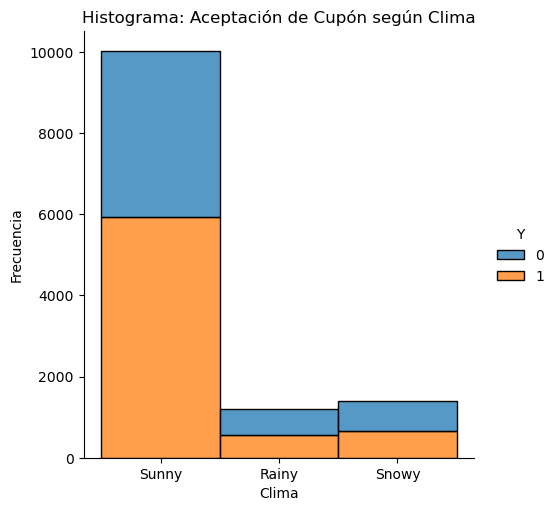

In [26]:
sns.displot(data=df, x="weather", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Clima')
plt.xlabel('Clima')
plt.ylabel('Frecuencia')
plt.show()

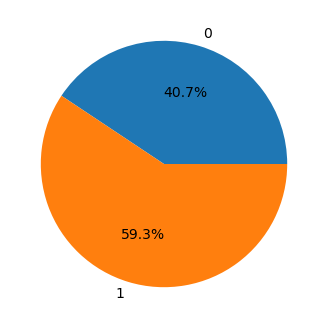

In [28]:
df2 = df[df['weather']== 'Sunny'].groupby(['Y']).count()
x = df2.index
y = df2['weather']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.show()

**Temperatura. Variable 'temperature'**</br>


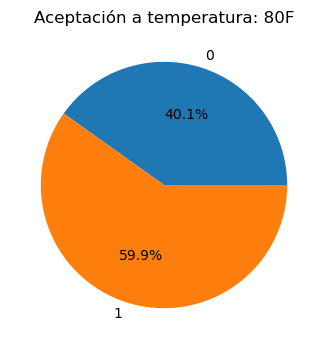

In [31]:
df3 = df[df['temperature']== 80].groupby(['Y']).count()
x = df3.index
y = df3['temperature']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación a temperatura: 80F')
plt.show()

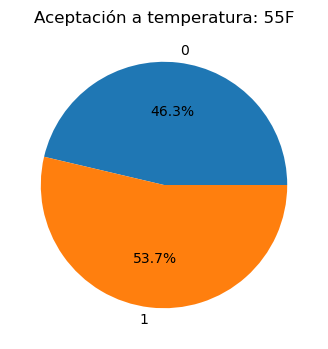

In [33]:
df3 = df[df['temperature']== 55].groupby(['Y']).count()
x = df3.index
y = df3['temperature']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación a temperatura: 55F')
plt.show()

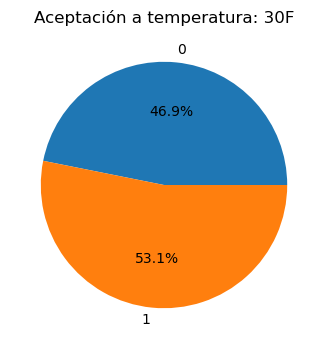

In [35]:
df3 = df[df['temperature']== 30].groupby(['Y']).count()
x = df3.index
y = df3['temperature']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación a temperatura: 30F')
plt.show()

**Destino. Variable 'destination'**</br>
Se observa mayor probabilidad de aceptación en viajes con destinos no urgentes

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


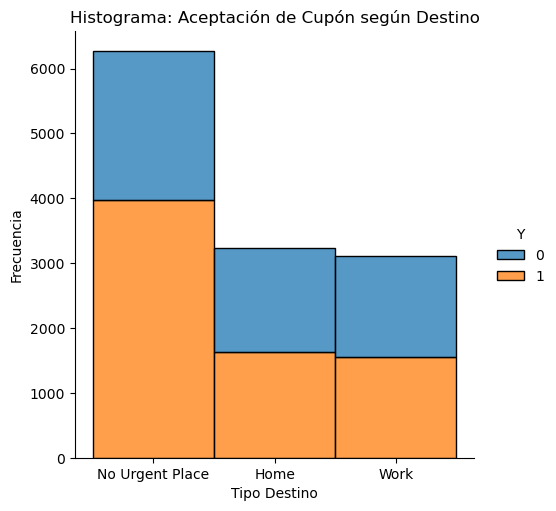

In [38]:
sns.displot(data=df, x="destination", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Destino')
plt.xlabel('Tipo Destino')
plt.ylabel('Frecuencia')
plt.show()

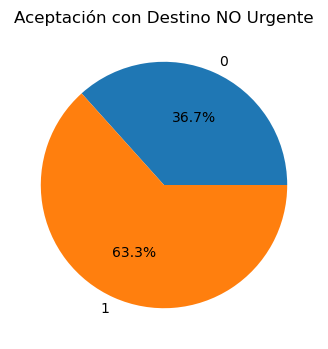

In [40]:
df4 = df[df['destination']== 'No Urgent Place'].groupby(['Y']).count()
x = df4.index
y = df4['destination']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación con Destino NO Urgente')
plt.show()

**Tipo de Pasajeros. Variable 'passanger'**</br>
Se observa tendencia positiva a la aceptación de cupones en contextos de Amigos: 'Friend(s)' y Pareja: 'Partner'


C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


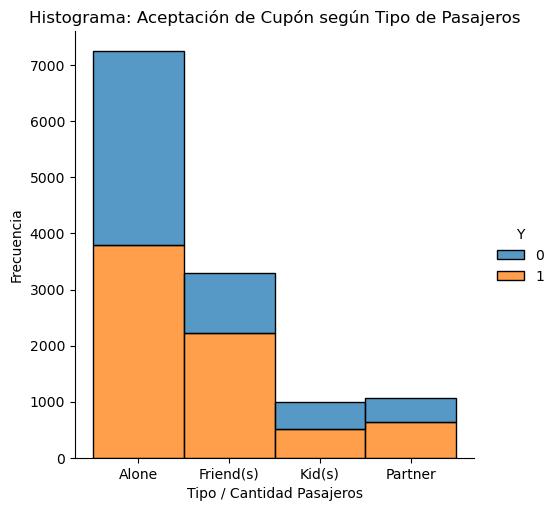

In [43]:
sns.displot(data=df, x="passanger", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Tipo de Pasajeros')
plt.xlabel('Tipo / Cantidad Pasajeros')
plt.ylabel('Frecuencia')
plt.show()

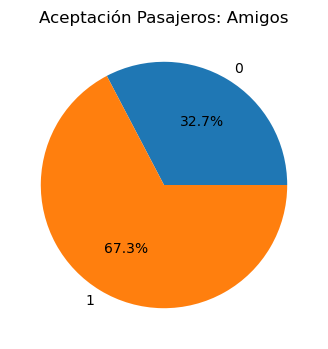

In [45]:
df5 = df[df['passanger']== 'Friend(s)'].groupby(['Y']).count()
x = df5.index
y = df5['passanger']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación Pasajeros: Amigos')
plt.show()

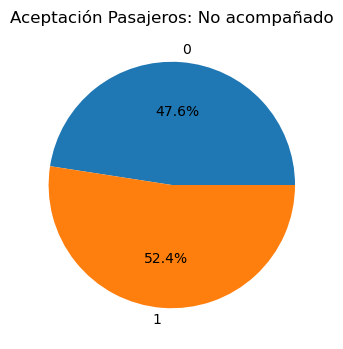

In [47]:
df5 = df[df['passanger']== 'Alone'].groupby(['Y']).count()
x = df5.index
y = df5['passanger']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación Pasajeros: No acompañado')
plt.show()

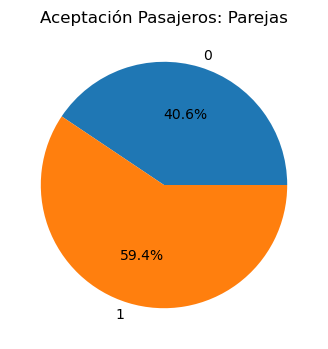

In [49]:
df5 = df[df['passanger']== 'Partner'].groupby(['Y']).count()
x = df5.index
y = df5['passanger']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación Pasajeros: Parejas')
plt.show()

**Horario. Variable 'time'**</br>
Se observa que la probabilidad de que un cupón sea aceptado es mayor en lo horarios economicamente más activos, siendo menor en los extremos (temprano por la mañana y tarde por la noche)

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


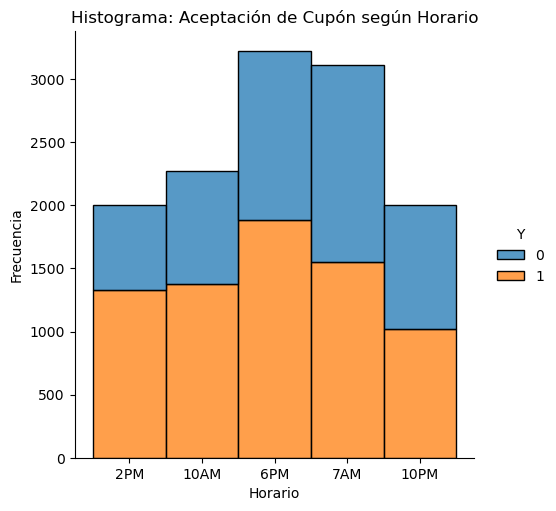

In [52]:
sns.displot(data=df, x="time", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Horario')
plt.xlabel('Horario')
plt.ylabel('Frecuencia')
plt.show()

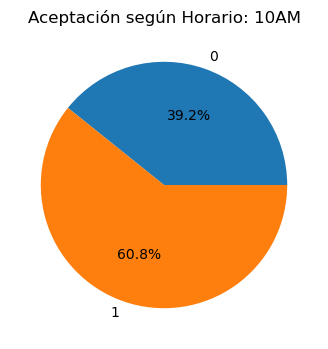

In [54]:
df6 = df[df['time']== '10AM'].groupby(['Y']).count()
x = df6.index
y = df6['time']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación según Horario: 10AM')
plt.show()

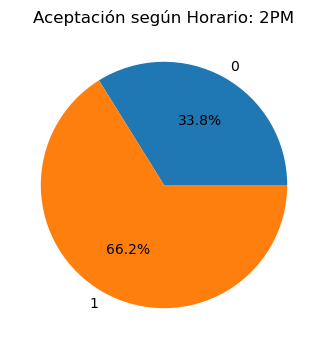

In [56]:
df6 = df[df['time']== '2PM'].groupby(['Y']).count()
x = df6.index
y = df6['time']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación según Horario: 2PM')
plt.show()

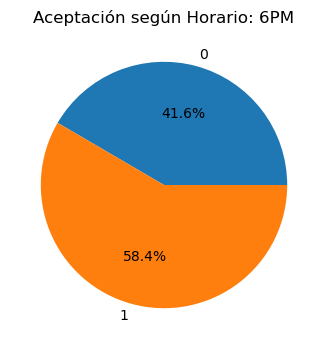

In [58]:
df6 = df[df['time']== '6PM'].groupby(['Y']).count()
x = df6.index
y = df6['time']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación según Horario: 6PM')
plt.show()

**Tipo de Cupón**</br>
Se observa una marcada tendencia positiva a la aceptación del cupón en Restaurantes de bajo consumo promedio y opciones Take Away. Por lo que se observa una tendencia hacia lugares de rápido consumo, orientados hacia comida (y no refrigerio), y ticket promedio más bajo

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


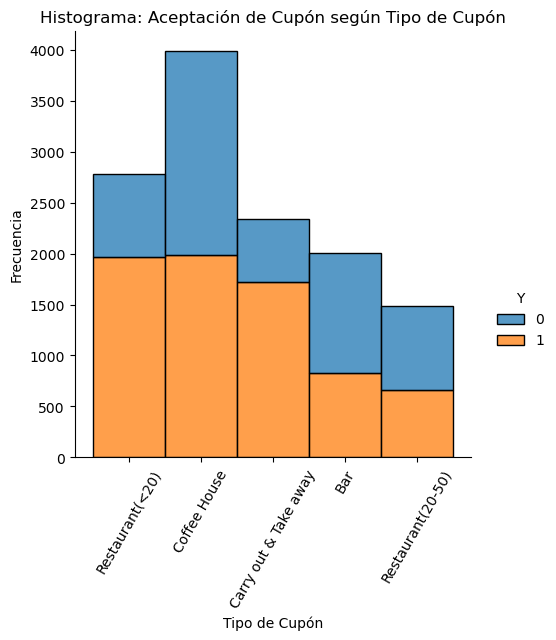

In [61]:
sns.displot(data=df, x="coupon", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Tipo de Cupón')
plt.xticks(rotation=60)
plt.xlabel('Tipo de Cupón')
plt.ylabel('Frecuencia')
plt.show()

**Vigencia de Cupón. Variable 'expiration'** </br>
Hay una tendencia hacia la aceptación de cupones con mayor tiempo de vigencia

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


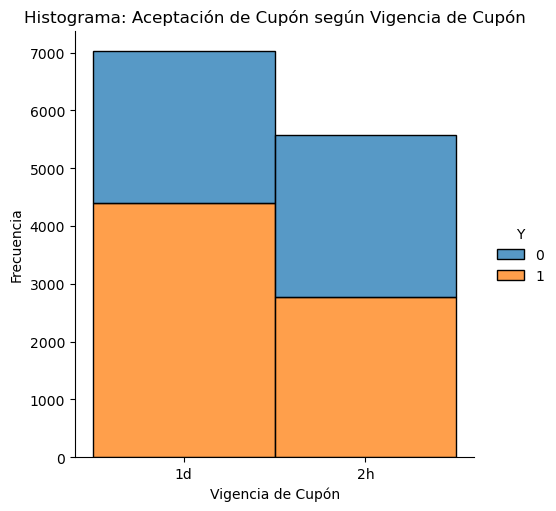

In [64]:
sns.displot(data=df, x="expiration", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Vigencia de Cupón')
plt.xlabel('Vigencia de Cupón')
plt.ylabel('Frecuencia')
plt.show()

**Distribución por Género. Variable 'gender'**</br>
Se observa una tendencia positiva de los varones a la aceptación de los cupones

C:\Users\felip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


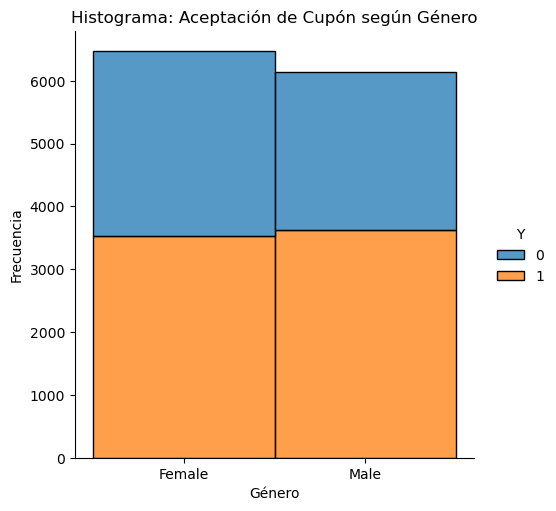

In [67]:
sns.displot(data=df, x="gender", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

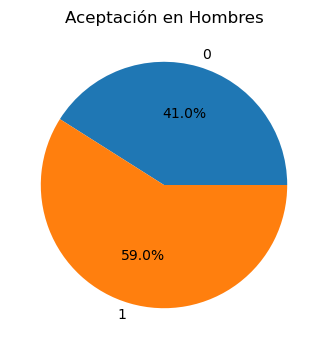

In [69]:
df7 = df[df['gender']== 'Male'].groupby(['Y']).count()
x = df7.index
y = df7['gender']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación en Hombres')
plt.show()

**Segmentación por Edad. Variable 'age'** </br>
Existe una probabilidad mayor de aceptación entre jóvenes. Ver vinculación de esta variable con estado civil.

In [72]:
dfage = df.groupby('age').count()
dfage2 = df[df['Y']==1].groupby('age').count()

dfseries = {'Q Total': pd.Series(dfage['Y']),'Q Aceptan': pd.Series(dfage2['Y'])}
df_age = pd.DataFrame(dfseries)
df_age['%_Aceptan'] = df_age['Q Aceptan']/df_age['Q Total']*100
df_age.sort_values('%_Aceptan', ascending=False).round(1)

,Q Total,Q Aceptan,%_Aceptan
age,,,
below21,544,344,63.2
21,2642,1579,59.8
26,2548,1517,59.5
46,670,384,57.3
41,1089,623,57.2
31,2019,1102,54.6
36,1317,705,53.5
50plus,1781,903,50.7


**Estado Civil. Variable 'maritalStatus'** </br>
En cuanto al estado civil se observan las parejas sin casar y sobre todo los solteros como el segmento más predispuesto a aceptar los cupones. Tal vez sea más relevante para este estudio la variable edad.




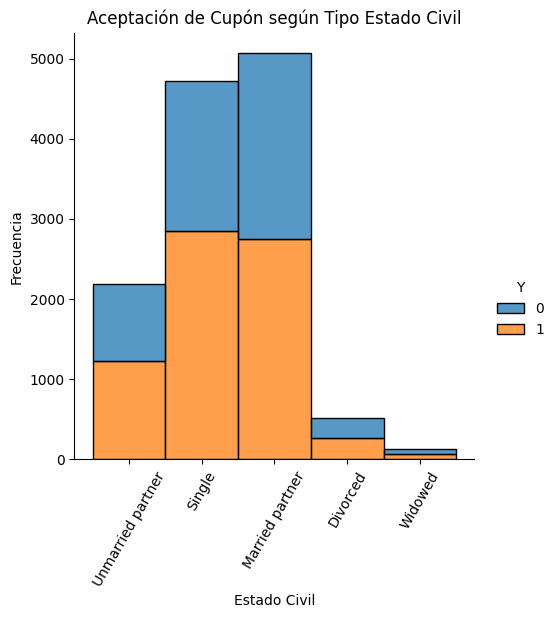

In [ ]:
sns.displot(data=df, x="maritalStatus", hue="Y", multiple="stack")
plt.title('Aceptación de Cupón según Tipo Estado Civil')
plt.xticks(rotation = 60)
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
dms = df.groupby('maritalStatus').count()
dms2 = df[df['Y']==1].groupby('maritalStatus').count()

dfms = {'Q Total': pd.Series(dms['Y']),'Q Aceptan': pd.Series(dms2['Y'])}
df_ms = pd.DataFrame(dfms)
df_ms['%_Aceptan'] = df_ms['Q Aceptan']/df_ms['Q Total']*100
df_ms.sort_values('%_Aceptan', ascending=False).round(1)

,Q Total,Q Aceptan,%_Aceptan
maritalStatus,,,
Single,4716,2851,60.5
Unmarried partner,2185,1226,56.1
Married partner,5068,2749,54.2
Divorced,511,269,52.6
Widowed,130,62,47.7


In [ ]:
pd.crosstab(index=df['maritalStatus'],
            columns=df['age'], margins=True)

age,21,26,31,36,41,46,50plus,below21,All
maritalStatus,,,,,,,,,
Divorced,0,0,66,109,128,22,186,0,511
Married partner,441,823,1109,740,731,343,881,0,5068
Single,1477,1198,566,248,208,240,411,368,4716
Unmarried partner,724,527,278,220,22,65,173,176,2185
Widowed,0,0,0,0,0,0,130,0,130
All,2642,2548,2019,1317,1089,670,1781,544,12610


**Personas con o sin Hijos. Variable 'has_children'** </br>
Las personas sin hijos tienden ligeramente a aceptar los cupones en un grado ligeramente mayor que los que tienen hijos

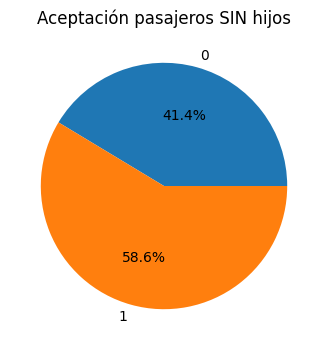

In [ ]:
df8 = df[df['has_children']== 0].groupby(['Y']).count()
x = df8.index
y = df8['has_children']
fig, ax = plt.subplots(figsize = (6,4))
ax.pie(y, labels = x, autopct='%1.1f%%')
plt.title('Aceptación pasajeros SIN hijos')
plt.show()

**Aceptación según Nivel Educativo** </br>
Se presenta una marcada tendencia a la aceptación de cupones en los niveles educativos más bajos, especialmente en aquellos que no finalizaron los estudios de nivel medio.

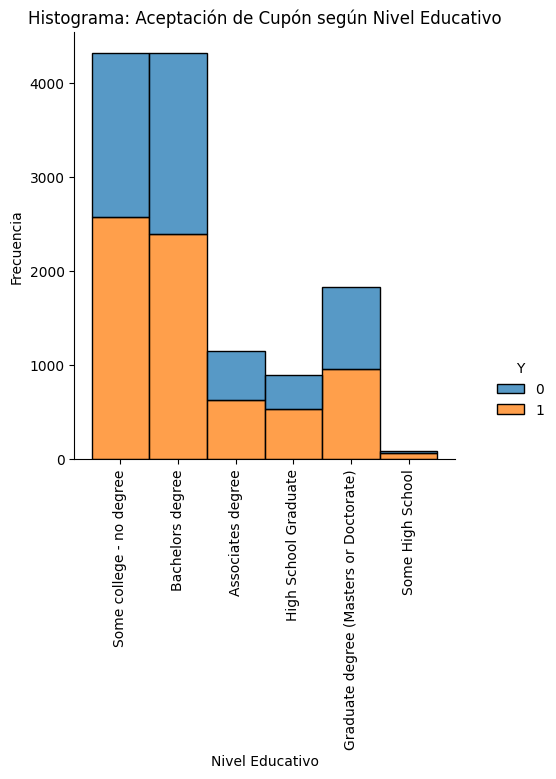

In [ ]:
sns.displot(data=df, x="education", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Nivel Educativo')
plt.xticks(rotation = 90)
plt.xlabel('Nivel Educativo')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
ded = df.groupby('education').count()
ded2 = df[df['Y']==1].groupby('education').count()

dfed = {'Q Total': pd.Series(ded['Y']),'Q Aceptan': pd.Series(ded2['Y'])}
df_ed = pd.DataFrame(dfed)
df_ed['%_Aceptan'] = df_ed['Q Aceptan']/df_ed['Q Total']*100
df_ed.sort_values('%_Aceptan', ascending=False).round(1)

,Q Total,Q Aceptan,%_Aceptan
education,,,
Some High School,88,63,71.6
Some college - no degree,4325,2577,59.6
High School Graduate,899,532,59.2
Bachelors degree,4323,2395,55.4
Associates degree,1148,634,55.2
Graduate degree (Masters or Doctorate),1827,956,52.3


**Ocupación. Variable 'occupation'**</br>
Profesiones vinculadas a la construcción, salud y estudiantes son los más propensos a aceptar los cupones

In [ ]:
doc = df.groupby('occupation').count()
doc2 = df[df['Y']==1].groupby('occupation').count()
dfoc = {'Q Total': pd.Series(doc['Y']),'Q Aceptan': pd.Series(doc2['Y'])}
df_oc = pd.DataFrame(dfoc)
df_oc['%_Aceptan'] = df_oc['Q Aceptan']/df_oc['Q Total']*100
df_oc.sort_values('%_Aceptan', ascending=False).round(1)

,Q Total,Q Aceptan,%_Aceptan
occupation,,,
Healthcare Support,242,169,69.8
Construction & Extraction,154,106,68.8
Healthcare Practitioners & Technical,244,165,67.6
Protective Service,174,112,64.4
Architecture & Engineering,175,111,63.4
Production Occupations,108,67,62.0
Student,1575,960,61.0
Office & Administrative Support,638,383,60.0
Transportation & Material Moving,218,130,59.6


**Ingresos. Variable 'income'**</br>
En este caso hay una cierta homogeneidad respecto a la aceptación en función del ingreso, excepto en el extremo superior, donde la tasa de aceptación baja considerablemente.

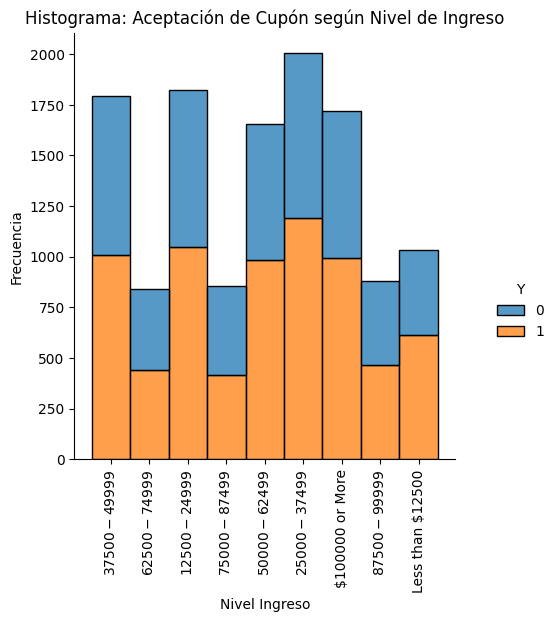

In [ ]:
sns.displot(data=df, x="income", hue="Y", multiple="stack")
plt.title('Histograma: Aceptación de Cupón según Nivel de Ingreso')
plt.xticks(rotation = 90)
plt.xlabel('Nivel Ingreso')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
din = df.groupby('income').count()
din2 = df[df['Y']==1].groupby('income').count()

dfin = {'Q Total': pd.Series(din['Y']),'Q Aceptan': pd.Series(din2['Y'])}
df_in = pd.DataFrame(dfin)
df_in['%_Aceptan'] = df_in['Q Aceptan']/df_in['Q Total']*100
df_in.sort_values('%_Aceptan', ascending=False).round(1)

,Q Total,Q Aceptan,%_Aceptan
income,,,
$50000 - $62499,1655,984,59.5
$25000 - $37499,2006,1190,59.3
Less than $12500,1034,612,59.2
$100000 or More,1717,992,57.8
$12500 - $24999,1825,1047,57.4
$37500 - $49999,1795,1010,56.3
$87500 - $99999,879,465,52.9
$62500 - $74999,843,443,52.6
$75000 - $87499,856,414,48.4


#**Conclusiones EDA**</br>
* Las variables de usuario que tienen más preponderancia para este estudio son las de edad y nivel educativo. En menor medida, si tiene o no hijos y género.
* Las variables contextuales parecieran tener mayor preponderancia, destacando el clima, la temperatura, acompañantes, y destino. Buen clima y situaciones sociales entre pares o informales, se destacan como elementos que favorecen la aceptación de los cupones promocionales
* En cuanto a las promocionales, el tipo de cupón presenta una clara tendencia a la hora de ser aceptado, especialmente aquellas promociones que provienen de establecimientos más económicos y menos ostentosos.</br>
Se verifica, entonces, que hay ciertas condiciones que propician la aceptación de los cupones y, estas están relacionadas con situaciones informales, de entretenimiento, poco compromiso, y en usuarios jóvenes, con niveles de ingreso medio y varones.

##**Insights y Recomendaciones: Etapa Descriptiva**</br>
* Como respuesta a la primera pregunta, recomendaría a las empresas focalizar los beneficios en hombres jóvenes, menores de 30 y con un nivel educativo poco avanzado (menor a título de grado), y niveles de ingreso intermedio de acuerdo a una relación previsible entre nivel educativo y nivel de ingreso.
* Al segundo conjunto de interrogantes, el buen clima y las situaciones sociales informales son los elementos contextuales más relevantes, alcanzando tasas de aceptación del orden del 60% en entornos con esas caracteríscticas.
* Por último, las variables promocionales más relevantes son las promociones con una mayor vigencia y ofrecidos por comercios con menor ticket promedio y menos sofisticados: Las modalidades "take away" y locales gastrónomicos de menos de USD 20 por ticket promedio, alcanzan tasas de aceptación de más del 70%, lo que lo hace una de las variables más efectivas.

## **Modelo de Data Science**

###**Preparación de los Datos**</br>
A partir de las conclusiones preliminares, se procede a prepara un dataset con las características necesarias para el desarrollo de un modelo explicativo a partir de herramientas provistas por la técnica de Machine Learning.</br>
Para este caso, se elegiran dos modelos de clasificación, puesto que predominan las variables categóricas. </br>
En primer lugar se trabajaran con las variables más relevantes del EDA para establecer un arbol de decisión que permita ver si la relación probabilístca encontrada en la fase exploratoria, tiene correlación en un modelo decisorio más complejo. </br>
En segundo lugar, exploraremos mediante la técnica de *clusters* si estas variables permiten agrupar a los clientes en distintos conjuntos homogéneos. Se establecerán la cantidad óptima de clusters y luego se los agrupará. </br>
Por último, se realizará una regresión logística para generar un modelo que prediga si el pasajero aceptará el cupón ( variable 'Y' = 1) o no lo hará (variable 'Y' = 0).

###**Feature Engineering**</br>
En este sección se trabajara las variables para prepararlas y adaptarlas a los fines de este trabajo. Puntualmente se volverán a analizar el desempeño de las variables utilizadas en la presentación anterior y se realizarán ajustes que mejoren el desempeño del Modelo. </br>
Al final del trabajo se incorporará unas conclusiones.

In [76]:
df_ds = df.copy()

In [78]:
# Se seleccionan las variables más relevantes, según lo observado en el EDA. De esta manera reduciremos la dimensionalidad una vez que manipulemos las variables.
df_ds_feat = df_ds[['weather','passanger','temperature','time','age','destination', 'expiration','education','income','coupon','gender','Y']]


In [80]:
# Weather, passanger, temperature, destination y gender se trabajarán mediante la técnica de 'getdummies'
# El resto de las variables, se trabajarán mediante labeling encoding utilizando el método 'replace', de manera ordinal (cuando corresponda), o bien mediante otras categorías que mejoren el balance del dataset
# Las variables de 'coupon' y 'passanger' se codificarán según escenario 'formal' o 'informal' según la naturaleza de cada categoría,
#puesto que se observan que las situaciones y opciones más lúdicas o decontracturada son las que tienen mayor probabilidad de aceptar el cupón de descuento
#NOTA:
#En esta entrega se reemplazaron las variables codeadas en 2 categorías por valores booleanos (0 y 1)

In [82]:
df_ds_feat.expiration.replace({'1d':24, '2h':2}, inplace = True)
df_ds_feat.coupon.replace({'Coffee House': 'Formal','Restaurant(<20)': 'Informal', 'Carry out & Take away': 'Informal','Bar': 'Formal', 'Restaurant(20-50)': 'Formal'}, inplace = True)
df_ds_feat.time.replace ({'6PM': 18, '7AM': 7,'10AM': 10, '2PM': 14, '10PM': 22}, inplace = True)
df_ds_feat['young_pass'] = df_ds_feat['age']
df_ds_feat.young_pass.replace({'below21': 1, '21': 1, '26':1, '31':0, '36':0,'41':0, '46': 0, '50plus':0}, inplace=True)
df_ds_feat['educ_low'] = df_ds_feat['education']
df_ds_feat.educ_low.replace({'Some college - no degree': 1, 'High School Graduate': 1, 'Some High School':1, 'Bachelors degree': 0,  'Graduate degree (Masters or Doctorate)':0, 'Associates degree':0 }, inplace= True)
df_ds_feat['inco_coded']=df_ds_feat['income']
df_ds_feat.inco_coded.replace({'Less than $12500': 1, '$12500 - $24999':1, '$37500 - $49999': 2, '$25000 - $37499':2, '$50000 - $62499': 3, '$62500 - $74999':3, '$75000 - $87499': 4, '$87500 - $99999':4, '$100000 or More':4}, inplace=True)
df_ds_feat['pass_coded'] = df_ds_feat['passanger']
df_ds_feat.pass_coded.replace({'Alone': 'Formal', 'Friend(s)': 'Informal', 'Partner': 'Informal', 'Kid(s)':'Formal'}, inplace = True)

C:\Users\felip\AppData\Local\Temp\ipykernel_15908\1300296941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds_feat.expiration.replace({'1d':24, '2h':2}, inplace = True)
C:\Users\felip\AppData\Local\Temp\ipykernel_15908\1300296941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds_feat.coupon.replace({'Coffee House': 'Formal','Restaurant(<20)': 'Informal', 'Carry out & Take away': 'Informal','Bar': 'Formal', 'Restaurant(20-50)': 'Formal'}, inplace = True)
C:\Users\felip\AppData\Local\Temp\ipykernel_15908\1300296941.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [84]:
#Se borran las columnas que no se utilizarán
df_ds_feat.drop(['age','education','income', 'passanger'], axis = 1, inplace = True)

C:\Users\felip\AppData\Local\Temp\ipykernel_15908\2978366493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds_feat.drop(['age','education','income', 'passanger'], axis = 1, inplace = True)


In [86]:
#Revisamos las categorías para ver si quedaron balanceadas
for (etiqueta, content) in df_ds_feat.iteritems():
    print(etiqueta)
    print(content.value_counts())



AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [88]:
# Se convierten las variables categóricas en variables binarias mediante el método "get_dummies"
df_feat = pd.get_dummies(df_ds_feat, drop_first= False)
df_feat.head()

,temperature,time,expiration,Y,young_pass,educ_low,inco_coded,weather_Rainy,weather_Snowy,weather_Sunny,destination_Home,destination_No Urgent Place,destination_Work,coupon_Formal,coupon_Informal,gender_Female,gender_Male,pass_coded_Formal,pass_coded_Informal
0,55,14,24,1,1,1,2,False,False,True,False,True,False,False,True,True,False,True,False
1,80,10,2,0,1,1,2,False,False,True,False,True,False,True,False,True,False,False,True
2,80,10,2,1,1,1,2,False,False,True,False,True,False,False,True,True,False,False,True
3,80,14,2,0,1,1,2,False,False,True,False,True,False,True,False,True,False,False,True
4,80,14,24,0,1,1,2,False,False,True,False,True,False,True,False,True,False,False,True


In [90]:
#Se eliminan las columnas que pueden ser inferidas desde otras más representativas:
#Por ejemplo, se deja solamente la columna de clima soleado, puesto que es la relevante y se infiere a través de los valores 0 y 1
# Se hace lo propio con el tipo de pasajeros, género, destino y tipo de cupón
df_feat.drop(['weather_Rainy', 'weather_Snowy', 'destination_Home', 'destination_Work', 'pass_coded_Formal', 'coupon_Formal', 'gender_Female'], axis = 1, inplace = True)

**Modelo I : Arbol de Clasificación**

In [93]:
model = DecisionTreeClassifier()

In [95]:
df_feat_tree = df_feat[['destination_No Urgent Place','coupon_Informal', 'weather_Sunny', 'expiration']]

In [97]:
variables = df_feat_tree
destino = df_feat.Y

In [99]:
model.fit(X = variables, y = destino)

DecisionTreeClassifier()

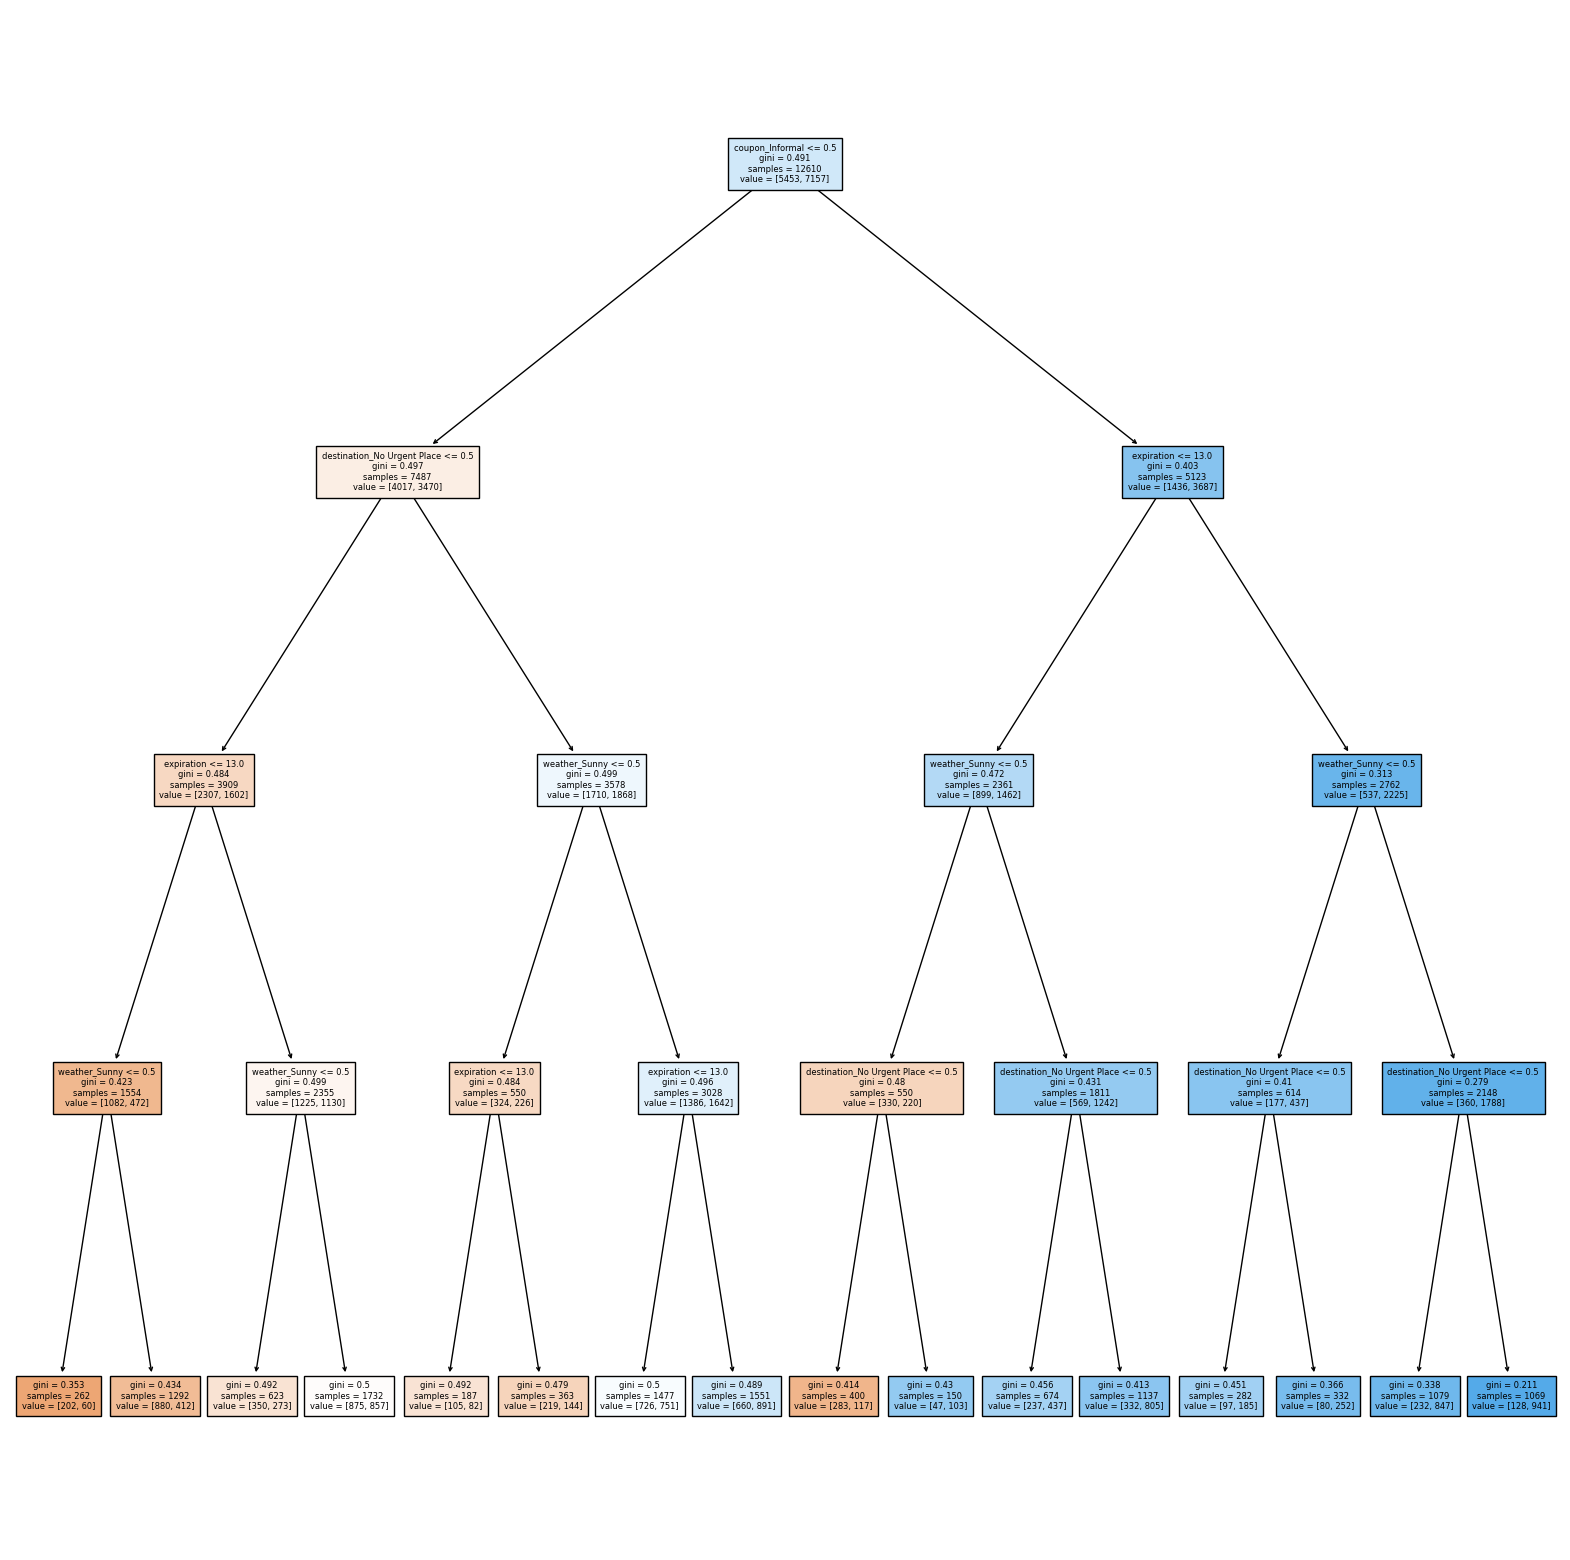

In [101]:
plt.figure(figsize = (20,20))
plot_tree(decision_tree = model, feature_names = variables.columns, filled=True, fontsize = 6);



**Modelo II: K-MEANS**

In [ ]:

from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

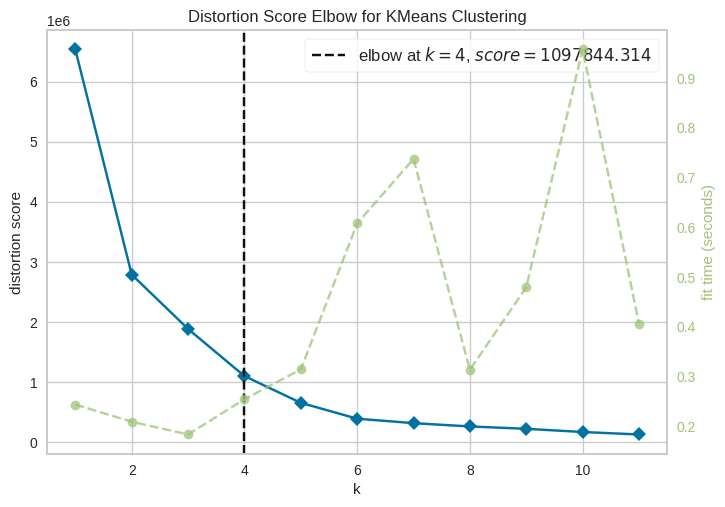

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_feat)
visualizer.show();

In [ ]:
escale = MinMaxScaler().fit(df_feat.values)
accept = pd.DataFrame(escale.transform(df_feat.values))
kmeans = KMeans(n_clusters = 4, max_iter = 300).fit(accept.values)
accept['cluster'] = kmeans.labels_
accept

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,cluster
0,0.5,0.466667,1.0,1.0,1.0,1.0,0.333333,1.0,1.0,1.0,0.0,0.0,3
1,1.0,0.200000,0.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,0.0,1.0,0
2,1.0,0.200000,0.0,1.0,1.0,1.0,0.333333,1.0,1.0,1.0,0.0,1.0,0
3,1.0,0.466667,0.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,0.0,1.0,0
4,1.0,0.466667,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,0.5,0.733333,1.0,1.0,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,1.0,1
12606,0.5,0.000000,1.0,1.0,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,0.0,1
12607,0.0,0.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1
12608,0.0,0.000000,1.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
df_cluster = df_feat.merge(accept['cluster'], how = 'inner', left_index= True, right_index= True)

In [ ]:
df_cluster

,temperature,time,expiration,Y,young_pass,educ_low,inco_coded,weather_Sunny,destination_No Urgent Place,coupon_Informal,gender_Male,pass_coded_Informal,cluster
0,55,14,24,1,1,1,2,1,1,1,0,0,3
1,80,10,2,0,1,1,2,1,1,0,0,1,0
2,80,10,2,1,1,1,2,1,1,1,0,1,0
3,80,14,2,0,1,1,2,1,1,0,0,1,0
4,80,14,24,0,1,1,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12605,80,22,24,0,0,1,1,1,0,0,0,0,1
12606,55,7,2,0,0,1,1,0,0,1,0,0,1
12607,55,7,24,0,0,1,1,0,0,1,0,0,1
12608,30,7,24,1,0,1,1,0,0,0,0,0,1


In [ ]:
df_cluster.corr().round(2)

,temperature,time,expiration,Y,young_pass,educ_low,inco_coded,weather_Sunny,destination_No Urgent Place,coupon_Informal,gender_Male,pass_coded_Informal,cluster
temperature,1.00,-0.04,-0.13,0.06,0.03,0.00,-0.03,0.58,0.14,-0.08,-0.02,0.10,-0.03
time,-0.04,1.00,-0.02,0.01,-0.01,-0.01,0.01,0.02,0.10,0.02,-0.01,0.19,-0.06
expiration,-0.13,-0.02,1.00,0.13,0.01,0.01,-0.02,-0.06,-0.06,-0.03,0.00,-0.11,0.08
Y,0.06,0.01,0.13,1.00,0.06,0.05,-0.03,0.10,0.13,0.25,0.04,0.13,0.05
young_pass,0.03,-0.01,0.01,0.06,1.00,0.08,-0.14,0.01,-0.02,-0.01,0.10,0.04,0.00
educ_low,0.00,-0.01,0.01,0.05,0.08,1.00,-0.27,0.01,-0.00,0.00,0.01,0.02,-0.00
inco_coded,-0.03,0.01,-0.02,-0.03,-0.14,-0.27,1.00,-0.01,0.03,-0.00,0.09,0.01,0.00
weather_Sunny,0.58,0.02,-0.06,0.10,0.01,0.01,-0.01,1.00,0.10,-0.04,-0.03,0.12,0.06
destination_No Urgent Place,0.14,0.10,-0.06,0.13,-0.02,-0.00,0.03,0.10,1.00,0.05,0.01,0.65,-0.20
coupon_Informal,-0.08,0.02,-0.03,0.25,-0.01,0.00,-0.00,-0.04,0.05,1.00,0.00,0.05,0.00


<Axes: >

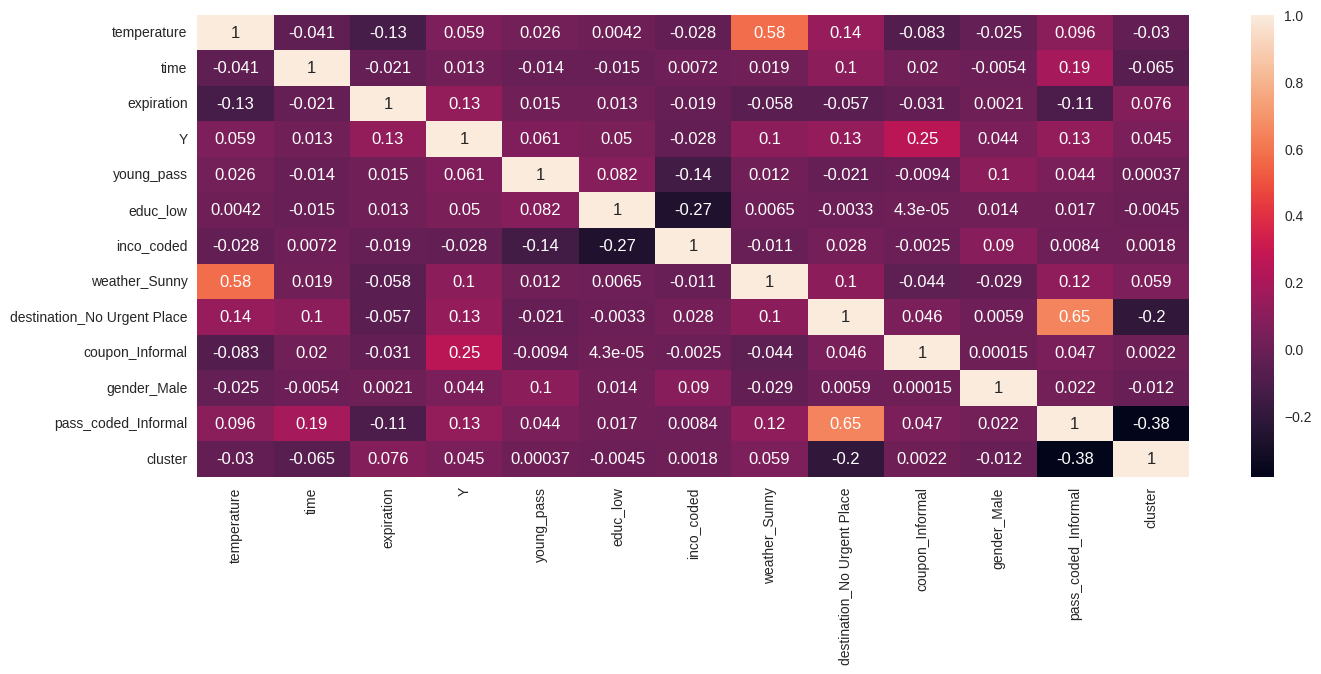

In [ ]:
plt.figure(figsize = (16,6))
sns.heatmap(df_cluster.corr(), annot = True)

In [ ]:
cluster_desc = df_cluster.groupby(['cluster']).mean()
cluster_desc = cluster_desc.transpose()
cluster_desc.round(2)

cluster,0,1,2,3
temperature,67.81,53.40,64.74,63.97
time,14.01,14.69,13.52,13.31
expiration,12.92,15.38,13.54,15.60
Y,0.60,0.55,0.34,0.73
young_pass,0.47,0.43,0.44,0.47
educ_low,0.43,0.42,0.41,0.43
inco_coded,2.50,2.54,2.51,2.51
weather_Sunny,0.84,0.56,0.87,0.84
destination_No Urgent Place,0.68,0.45,0.37,0.44
coupon_Informal,0.40,0.45,0.33,0.44


In [ ]:
df_cluster['cluster'].value_counts()

0    3822
3    3519
2    2854
1    2341
Name: cluster, dtype: int64

In [ ]:
Cluster_3 = df_cluster[df_cluster['cluster']==3]
Cluster_3.describe()

,temperature,time,expiration,Y,young_pass,educ_low,inco_coded,weather_Sunny,destination_No Urgent Place,coupon_Informal,gender_Male,pass_coded_Informal,cluster
count,3519.000000,3519.000000,3519.000000,3519.00000,3519.000000,3519.000000,3519.000000,3519.00000,3519.000000,3519.000000,3519.000000,3519.000000,3519.0
mean,63.972720,13.313157,15.603865,0.72549,0.468599,0.425689,2.512930,0.84058,0.435067,0.436488,0.490764,0.184143,3.0
std,17.315677,5.444926,10.688889,0.44633,0.499084,0.494517,1.106234,0.36612,0.495836,0.496020,0.499986,0.387656,0.0
min,30.000000,7.000000,2.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.0
25%,55.000000,7.000000,2.000000,0.00000,0.000000,0.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,3.0
50%,55.000000,14.000000,24.000000,1.00000,0.000000,0.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,3.0
75%,80.000000,18.000000,24.000000,1.00000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,0.000000,3.0
max,80.000000,22.000000,24.000000,1.00000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,3.0


In [ ]:
Cluster_0 = df_cluster[df_cluster['cluster']==0]
Cluster_0.describe()

,temperature,time,expiration,Y,young_pass,educ_low,inco_coded,weather_Sunny,destination_No Urgent Place,coupon_Informal,gender_Male,pass_coded_Informal,cluster
count,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.000000,3822.0
mean,67.813972,14.014390,12.919414,0.601518,0.467556,0.429618,2.502616,0.840659,0.683150,0.403977,0.495552,0.644427,0.0
std,18.270989,4.741256,11.001144,0.489650,0.499012,0.495086,1.113016,0.366041,0.465309,0.490757,0.500046,0.478749,0.0
min,30.000000,7.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,55.000000,10.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,80.000000,14.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0
75%,80.000000,18.000000,24.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,80.000000,22.000000,24.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [ ]:
cluster_desc.describe()

cluster,0,1,2,3
count,12.000000,12.000000,12.000000,12.000000
mean,8.484737,7.472376,8.143074,8.284124
std,19.323056,15.497506,18.512224,18.336035
min,0.403977,0.293037,0.187456,0.184143
25%,0.488553,0.441051,0.361247,0.436132
50%,0.663789,0.527979,0.445865,0.608127
75%,5.106816,5.576143,5.264366,5.212987
max,67.813972,53.398120,64.740715,63.972720


In [ ]:
mc = prince.MCA(n_components = 2).fit(df_cluster)



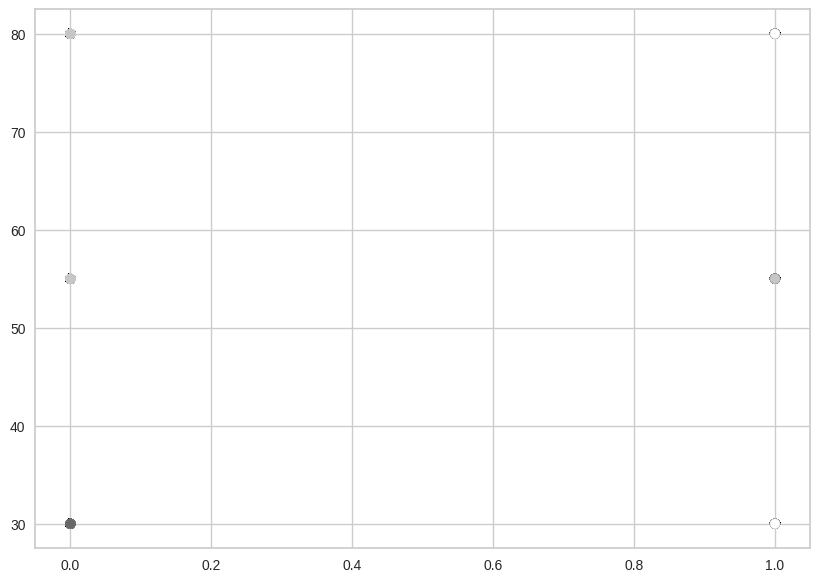

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes()
ax.scatter(df_cluster["young_pass"], df_cluster["temperature"], c=df_cluster['cluster'])

plt.show()

**Modelo III: Regresión Logística**

In [ ]:
df_feat.columns

Index(['temperature', 'time', 'expiration', 'Y', 'young_pass', 'educ_low',
       'inco_coded', 'weather_Sunny', 'destination_No Urgent Place',
       'coupon_Informal', 'gender_Male', 'pass_coded_Informal'],
      dtype='object')

In [ ]:
df_feat2 = df_feat[['coupon_Informal','young_pass','educ_low','pass_coded_Informal','expiration', 'weather_Sunny','destination_No Urgent Place']]

In [ ]:
X = np.array(df_feat2)
y = np.array(df_feat['Y'])

In [ ]:
model = linear_model.LogisticRegression(max_iter = 1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = model.predict(X)
print(predictions)

[1 1 1 ... 0 0 0]


In [ ]:
model.score(X,y).round(3)

0.649

In [ ]:
validation_size = 0.25
seed = 42
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed )

In [ ]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions).round(3))
print(metrics.recall_score(Y_test, predictions, pos_label=1).round(3))

0.64
0.716


In [ ]:
print(classification_report(Y_test, predictions))



              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1381
           1       0.67      0.72      0.69      1772

    accuracy                           0.64      3153
   macro avg       0.63      0.63      0.63      3153
weighted avg       0.64      0.64      0.64      3153



In [ ]:
cm = confusion_matrix(Y_test, predictions)

<Axes: >

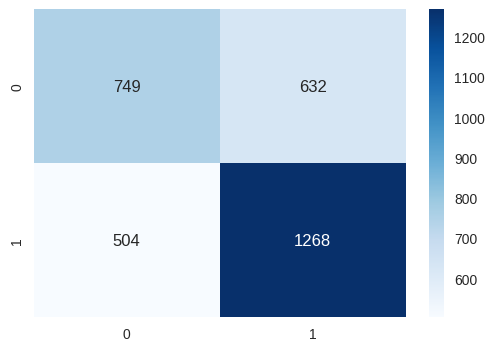

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues" )


###**Conclusiones Evaluación de Modelos de ML**</BR>
* Los modelos con mayor potencial son el árbol de decisiones y la regresión logística, puesto que tenemos una variable de salida 'Y' que acepta los valores 0 y 1
* Con los ajustes realizados al modelo en el apartado de Feature Engineering empeoró el desempeño del modelo de Clusters, dejándolos más desbalanceados, pero mejoró el desempeño de los otros dos modelos
* De los dos modelos con mejores prospectos, destaca el de Regresión Logística que fue ajustado en hiperparámetros: iteracciones, tamaño de test, y también en en cuanto a la inclusión de variables lo que supuso una mejora de los valores predictorios de accuracy y precision de valor salida 1
* Si bien puede parecer valores bajos, este caso se acerca a otras resoluciones más complejas que han dado niveles de accuracy del orden del 0,70
* Hay que tener en cuenta que es un caso de Marketing directo, que se compone por variables categóricas, que operan en situaciones muy complejas, por lo que es esperable niveles más bajos de accuracy
* Además, el tipo de actividad y las expectativas propias de la disciplina y el contexto permiten evaluar y lanzar programas con estos niveles de precision, que serían no admisibles en otros casos (como por ejemplo, medicina o prevención de riesgos / seguros).

###**Conclusiones Adicionales de Esta Entrega**</BR>


A través del método 'describe' se observa que las variables más relevantes en los clusters con mayor tasa de aceptación son las climáticas: clima soleado y temperatura cálida, sumado a las situaciones de pasajeros informales (amigos y pareja) y destinos no urgentes.